# Overview Performance

In [1]:
import pandas as pd
import numpy as np
import datetime

## Import Data Source

In [2]:
# data_src = "/Users/ruzlim/Code/Jupyter//Raw_Agg_Performance.csv"
# data_src = "c/Users/Narut4/coding/Jupyter/Raw_Agg_Performance.csv"

data_src = "Raw-Agg Perf_Wk 2023021.csv"
df = pd.read_csv(data_src)
df.head()

,TM_KEY_MTH,TM_KEY_WK,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,DIMENSION_KPI_FLAG,BG_FLAG,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_AGG,TARGET_AGG,PPN_TM
0,202303,2023009,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,N,N,N,0,GYR,%,M,13.96,20.0,2023-05-26 09:56:03
1,202303,2023012,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,N,N,N,0,GYR,%,M,15.55,20.0,2023-05-26 09:56:03
2,202304,2023013,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,N,N,N,0,GYR,%,M,14.20,20.0,2023-05-26 09:56:03
3,202304,2023014,Digitalization,Digitalization,TRUE,All Services,DIS10015,% After-Sales Service via Digital Channels,N,N,N,0,GYR,%,M,14.15,20.0,2023-05-26 09:56:03
4,202304,2023014,Digitalization,Digitalization,TRUE,Postpaid,DIS10017,% After-Sales Service via Digital Channels : T...,N,N,N,0,GYR,%,M,NaN,NaN,2023-05-26 09:56:03


## Analyze Data

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.mean(numeric_only=True)

## Null values

In [ ]:
# Check null value in each column

df.apply(lambda x: sum(x.isnull()), axis=0)

In [ ]:
# Fullfill null value example

# df_tmp = df
# df_tmp['ff_null'] = df_tmp['TARGET_AGG'].fillna(df_tmp['TARGET_AGG'].mean(), inplace=True)
# df_tmp['ff_null'] = df_tmp.apply(lambda x: sum(x.isnull()), axis=0)
# df_tmp.head()

## String

In [ ]:
# txt = "Sales & Revenue"
# txt.count("e")

# df_tmp = df_bg.iloc[:, :7]#.drop_duplicates()
# df_tmp = df.iloc[:, [0,2,3,4,5]].drop_duplicates()
# df_tmp = df_bg.iloc[:, [0,2,3,4,5]].drop_duplicates().sort_values(['TM_KEY_MTH','METRIC_GRP','COMP_CD','PRODUCT_GRP'])
df_tmp = df.loc[:, ['CENTER']].drop_duplicates()

# df_tmp['PRODUCT_GRP'].value_counts()['TDG']

# find
df_tmp['find_er'] = df_tmp['CENTER'].str.find('er')
df_tmp['findall_er'] = df_tmp['CENTER'].str.findall('er')
# count
df_tmp['count_er'] = df_tmp['CENTER'].str.count('er')
df_tmp['total_of_count_er'] = df_tmp['CENTER'].str.count('er').sum()
# contains
df_tmp['contains_er_on'] = df_tmp['CENTER'].str.contains(r'er|on')
df_tmp['total_of_contains_er_on'] = df_tmp['CENTER'].str.contains(r'er|on').sum()

# df_tmp.to_csv("temp.csv")
# df_tmp.to_excel("temp.xlsx")
# df_tmp.head()
# df_tmp.tail()
df_tmp

## Aggregate

In [ ]:
df.nunique()
# df.nunique(axis=1)

df['TM_KEY_WK'].unique()
df[['TM_KEY_MTH', 'TM_KEY_WK']].nunique()

df.groupby(['TM_KEY_MTH']).size()
# df.groupby(['TM_KEY_MTH']).count()
# df.groupby(['TM_KEY_MTH']).value_counts()

# How to count unique values ?
df.groupby('TM_KEY_MTH')['TM_KEY_WK'].nunique()
df.groupby(['TM_KEY_MTH', 'TM_KEY_WK'])['PRODUCT_GRP'].nunique()

# How to display unique values ?
df.groupby('TM_KEY_MTH')['TM_KEY_WK'].unique()
df.groupby(['TM_KEY_MTH', 'TM_KEY_WK'])['PRODUCT_GRP'].unique()

# df.head()

## Business Growth Data

In [3]:
# df_bg = df[(df['CENTER'] == 'Sales & Revenue') & (df['BG_FLAG'] == 'Y')]
df_bg = df[(df['BG_FLAG'] == 'Y') | ('METRIC_NAME' == 'TDG Revenue (Performance View)')]
# df_bg.sort_values(by=['TM_KEY_MTH', 'TM_KEY_WK', 'CENTER', 'METRIC_GRP', 'COMP_CD', 'PRODUCT_GRP', 'METRIC_CD'], ascending=True)
df_bg.head()

,TM_KEY_MTH,TM_KEY_WK,CENTER,METRIC_GRP,COMP_CD,PRODUCT_GRP,METRIC_CD,METRIC_NAME,DIMENSION_KPI_FLAG,BG_FLAG,AGG_TYPE,RR_IND,GRY_IND,UOM,PERIOD,ACTUAL_AGG,TARGET_AGG,PPN_TM
408,202303,2023010,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,Y,Y,S,0,GYR,baht,M,2.542705e+09,2.560220e+09,2023-05-26 09:56:03
409,202304,2023014,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,Y,Y,S,0,GYR,baht,M,1.796362e+09,1.824547e+09,2023-05-26 09:56:03
410,202305,2023019,Sales & Revenue,Revenue,ALL,Postpaid,B2R000100,Postpaid Revenue,Y,Y,S,0,GYR,baht,M,3.148715e+09,3.154019e+09,2023-05-26 09:56:03
622,202303,2023009,Sales & Revenue,Revenue,ALL,Prepaid,B1R000100,Prepaid Revenue,Y,Y,S,1,GYR,baht,M,6.699010e+08,6.262193e+08,2023-05-26 09:56:03
623,202304,2023014,Sales & Revenue,Revenue,ALL,Prepaid,B1R000100,Prepaid Revenue,Y,Y,S,1,GYR,baht,M,1.119646e+09,1.122306e+09,2023-05-26 09:56:03


In [ ]:
df_bg.shape
# df_bg.describe()

## Monthly Aggregate

In [ ]:
df_bg_agg_actual_mth = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
df_bg_agg_actual_mth.rename(columns={'ACTUAL_AGG': 'AGG'}, inplace=True)
df_bg_agg_actual_mth['MEASURE'] = 'ACTUAL'
# df_bg_agg_actual_mth.head()

df_bg_agg_target_mth = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'METRIC_CD', 'METRIC_NAME'])['TARGET_AGG'].sum().reset_index())
df_bg_agg_target_mth.rename(columns={'TARGET_AGG': 'AGG'}, inplace=True)
df_bg_agg_target_mth['MEASURE'] = 'TARGET'
# df_bg_agg_target_mth.head()

df_bg_agg_mth = pd.concat([df_bg_agg_actual_mth, df_bg_agg_target_mth])
df_bg_agg_mth['AGG'] = df_bg_agg_mth['AGG'] / 1000000
# df_bg_agg_mth.head()

In [ ]:
df_bg_agg_mth_pivot = df_bg_agg_mth.pivot(index=['TM_KEY_MTH', 'MEASURE'], columns=['METRIC_CD', 'METRIC_NAME'], values='AGG')
# df_bg_agg_mth_pivot
df_bg_agg_mth_pivot.T.round(2)

## Weekly Aggregate

In [ ]:
df_bg_agg_actual_wk = pd.DataFrame(df_bg.groupby(['TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
df_bg_agg_actual_wk.rename(columns={'ACTUAL_AGG': 'AGG'}, inplace=True)
df_bg_agg_actual_wk['MEASURE'] = 'ACTUAL'
# df_bg_agg_actual_wk.head()

df_bg_agg_target_wk = pd.DataFrame(df_bg.groupby(['TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['TARGET_AGG'].sum().reset_index())
df_bg_agg_target_wk.rename(columns={'TARGET_AGG': 'AGG'}, inplace=True)
df_bg_agg_target_wk['MEASURE'] = 'TARGET'
# df_bg_agg_target_wk.head()

df_bg_agg_wk = pd.concat([df_bg_agg_actual_wk, df_bg_agg_target_wk])
df_bg_agg_wk['AGG'] = df_bg_agg_wk['AGG'] / 1000000
# df_bg_agg_wk.head()

In [ ]:
df_bg_agg_wk_pivot = df_bg_agg_wk.pivot(index=['TM_KEY_WK', 'MEASURE'], columns=['METRIC_CD', 'METRIC_NAME'], values='AGG')
# df_bg_agg_wk_pivot

output_data = df_bg_agg_wk_pivot.T
output_data.round(2)

## Generate Output File

In [ ]:
output_file = data_src.replace("Raw-Agg", "BG").replace(".csv", ".xlsx")

output_data.to_excel(output_file)

print(f'\n"{output_file}" is generated')

## Visualization
##### https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [9]:
import matplotlib.pyplot as plt

In [5]:
# df_bg_agg_1 = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].sum().reset_index())
# df_bg_agg_1
# df_bg_agg_2 = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME'])['ACTUAL_AGG'].agg(['sum', 'count']).reset_index())
# df_bg_agg_2

# BG rawdata
df_bg_agg = pd.DataFrame(df_bg.groupby(['TM_KEY_MTH', 'TM_KEY_WK', 'METRIC_CD', 'METRIC_NAME']).agg({'ACTUAL_AGG': 'sum', 'TARGET_AGG': 'sum'}).reset_index())
df_bg_agg['ACTUAL_AGG'] = df_bg_agg['ACTUAL_AGG'] / 1000000
df_bg_agg['TARGET_AGG'] = df_bg_agg['TARGET_AGG'] / 1000000
df_bg_agg.head()

,TM_KEY_MTH,TM_KEY_WK,METRIC_CD,METRIC_NAME,ACTUAL_AGG,TARGET_AGG
0,202303,2023009,B1R000100,Prepaid Revenue,669.901008,626.219335
1,202303,2023009,B2R000100,Postpaid Revenue,1157.226110,1165.611851
2,202303,2023009,TB3R000100,TOL Revenue,189.713166,205.173356
3,202303,2023009,TB4R000100,TVS Revenue,42.430646,47.555946
4,202303,2023009,TNSC00142,TDG Revenue (Performance View),0.000000,0.000000


## Chart by month

In [15]:
# # df_bg_chart_mth = df_bg_agg.groupby('TM_KEY_MTH').sum(numeric_only=True).round(2)
# # df_bg_chart_mth

# x = df_bg_agg['TM_KEY_MTH'].unique()
# x_axis = np.arange(len(x))
# y_act = df_bg_agg.groupby('TM_KEY_MTH')['ACTUAL_AGG'].sum().round(2)
# y_tgt = df_bg_agg.groupby('TM_KEY_MTH')['TARGET_AGG'].sum().round(2)
# # z_ach = (y_act / y_tgt) * 100
# z_ach = ((df_bg_agg.groupby('TM_KEY_MTH')['ACTUAL_AGG'].sum() / df_bg_agg.groupby('TM_KEY_MTH')['TARGET_AGG'].sum()) * 100).round(2)

# Rawdata by month
df_bg_mth = df_bg_agg.groupby('TM_KEY_MTH').sum()[['ACTUAL_AGG','TARGET_AGG']].reset_index()
df_bg_mth['%ACHIEVE'] = (df_bg_mth['ACTUAL_AGG'] / df_bg_mth['TARGET_AGG']) * 100
df_bg_mth['ACTUAL_DIFF'] = df_bg_mth['ACTUAL_AGG'].diff()
df_bg_mth['LAST_MTH_ACTUAL'] = df_bg_mth['ACTUAL_AGG'] - df_bg_mth['ACTUAL_DIFF']
# df_bg_mth

,TM_KEY_MTH,ACTUAL_AGG,TARGET_AGG,%ACHIEVE,ACTUAL_DIFF,LAST_MTH_ACTUAL
0,202303,38853.323615,39332.934388,98.780638,NaN,NaN
1,202304,34478.092562,35148.679406,98.092142,-4375.231053,38853.323615
2,202305,27508.780117,27819.240211,98.884009,-6969.312445,34478.092562


### Monthly Bar

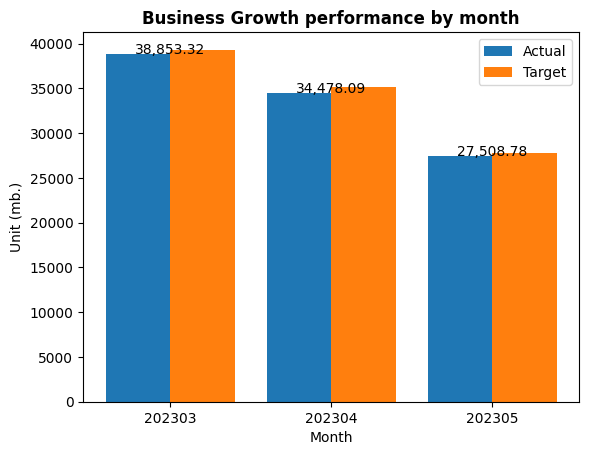

In [13]:
x = df_bg_mth['TM_KEY_MTH']
x_axis = np.arange(len(x))
y_act = df_bg_mth['ACTUAL_AGG'].round(2)
y_tgt = df_bg_mth['TARGET_AGG'].round(2)

# plt.figure(figsize=(12,6))
# plt.figure().set_figheight(4)
# plt.figure().set_figwidth(12)

plt.bar(x_axis - 0.2, y_act, 0.4, label='Actual')
plt.bar(x_axis + 0.2, y_tgt, 0.4, label='Target')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',')), xy=(x_axis[i], y_act[i]), ha='center')
    
plt.xticks(x_axis, x)
plt.xlabel('Month')
plt.ylabel('Unit (mb.)')
plt.title('Business Growth performance by month', fontdict={'fontweight': 'bold'})
plt.legend()
# plt.tight_layout()
plt.show()

## Chart by week

In [17]:
# df_bg_chart_wk = df_bg_agg.groupby('TM_KEY_WK').sum(numeric_only=True).round(2)
# df_bg_chart_wk

# x = df_bg_agg['TM_KEY_WK'].unique()
# x_axis = np.arange(len(x))
# y_act = df_bg_agg.groupby('TM_KEY_WK')['ACTUAL_AGG'].sum().round(2)
# y_tgt = df_bg_agg.groupby('TM_KEY_WK')['TARGET_AGG'].sum().round(2)

# Rawdata by week
df_bg_wk = df_bg_agg.groupby('TM_KEY_WK').sum()[['ACTUAL_AGG','TARGET_AGG']].reset_index()
df_bg_wk['%ACHIEVE'] = (df_bg_wk['ACTUAL_AGG'] / df_bg_wk['TARGET_AGG']) * 100
df_bg_wk['ACTUAL_DIFF'] = df_bg_wk['ACTUAL_AGG'].diff().fillna(0)
df_bg_wk['LAST_WK_ACTUAL'] = df_bg_wk['ACTUAL_AGG'] - df_bg_wk['ACTUAL_DIFF']
# df_bg_wk['FF_NULL_TEST'] = df_bg_wk['ACTUAL_DIFF'].fillna(0)
# df_bg_wk

x = df_bg_wk['TM_KEY_WK'].apply(str).str[5:]
x_axis = np.arange(len(x))
y_act = df_bg_wk['ACTUAL_AGG'].round(2)
y_tgt = df_bg_wk['TARGET_AGG'].round(2)
y_ach = df_bg_wk['%ACHIEVE'].round(2)
y_diff = df_bg_wk['ACTUAL_DIFF'].round(2)
y_last_act = df_bg_wk['LAST_WK_ACTUAL'].round(2)
# df_bg_wk

### Weekly Bar

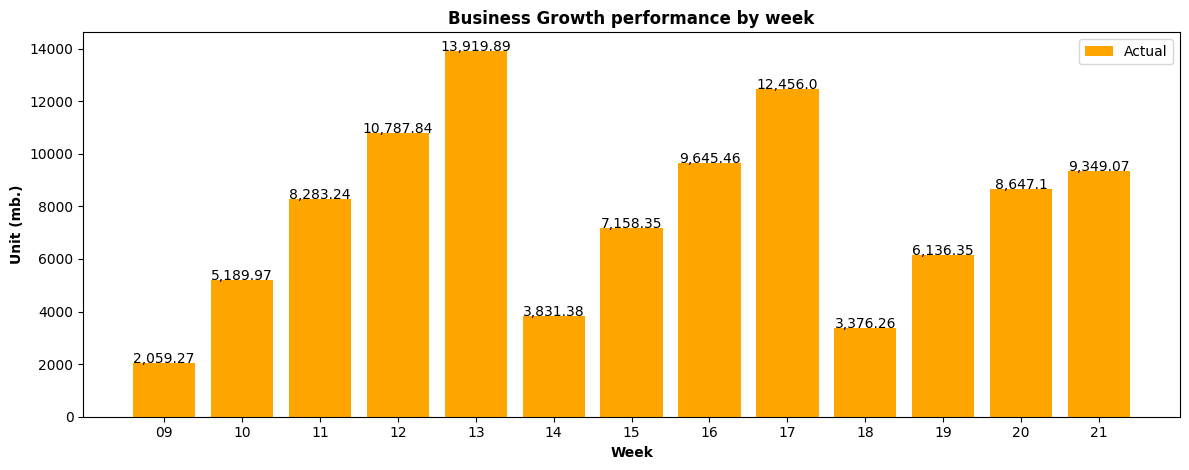

In [18]:
# plt.figure(figsize=(18,6))
plt.figure().set_figwidth(12)

plt.bar(x_axis, y_act, label='Actual', color='orange')
# plt.bar(x_axis - 0.2, y_act, 0.4, label='Actual')
# plt.bar(x_axis + 0.2, y_tgt, 0.4, label='Target')
for i in x_axis:    
    plt.annotate(str(format(y_act[i],',')), xy=(x_axis[i], y_act[i]), ha='center')
    # plt.annotate(str(y_act[i]), xy=(x_axis[i], y_act[i]))
    
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title('Business Growth performance by week', fontdict={'fontweight': 'bold'})
plt.legend()

plt.tight_layout()
plt.show()

### Weekly Plot

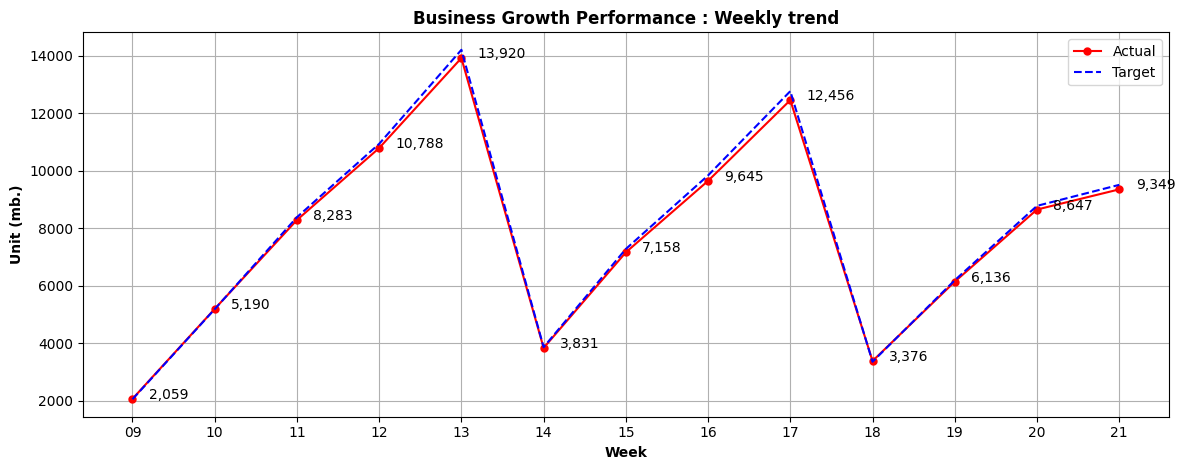

In [19]:
# plt.figure(figsize=(18,6))
plt.figure().set_figwidth(12)

# plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, markeredgecolor='red')
plt.plot(x_axis, y_act, marker='.', markeredgewidth=3, label='Actual', color='red')
# plt.plot(x_axis, y_tgt, marker='.', markeredgewidth=3, label='Target', color='blue')
plt.plot(x_axis, y_tgt, 'b--', markeredgewidth=3, label='Target')
for i in x_axis:
    plt.annotate(str(format(y_act[i],',.0f')), xy=(x_axis[i]+0.2, y_act[i]))

# plt.xticks(x_axis, rotation='horizontal')
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.title('Business Growth Performance : Weekly trend', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

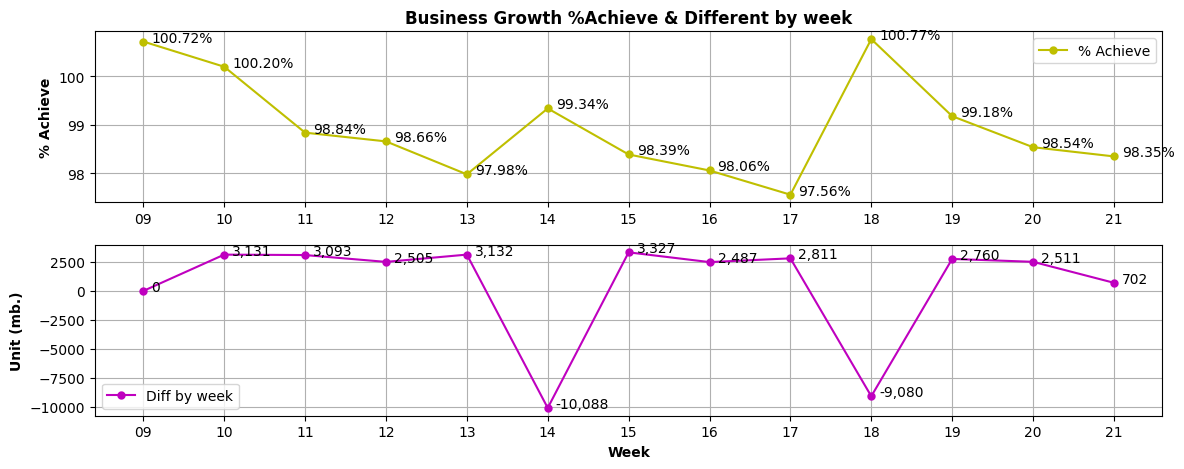

In [20]:
# plt.figure(figsize=(18,6))
plt.figure().set_figwidth(12)

plt.subplot(211)
plt.plot(x_axis, y_ach, marker='.', markeredgewidth=3, label='% Achieve', color='y')
for i in x_axis:
    plt.annotate(str(format(y_ach[i]/100,',.2%')), xy=(x_axis[i]+0.1, y_ach[i]))
plt.xticks(x_axis, x)
plt.title('Business Growth %Achieve & Different by week', fontdict={'fontweight': 'bold'})
plt.ylabel('% Achieve', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x_axis, y_diff, marker='.', markeredgewidth=3, label='Diff by week', color='m')
for i in x_axis:
    plt.annotate(str(format(y_diff[i],',.0f')), xy=(x_axis[i]+0.1, y_diff[i]))
plt.xticks(x_axis, x)
plt.xlabel('Week', fontdict={'fontweight': 'bold'})
plt.ylabel('Unit (mb.)', fontdict={'fontweight': 'bold'})
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()